In [1]:
import numpy as np
import rawpy
import matplotlib.pyplot as plt

dataset = ["IMG_3044.CR3", "IMG_3045.CR3", "IMG_3046.CR3", "IMG_3047.CR3", "IMG_3048.CR3", "IMG_3049.CR3"]
exposure_times = np.array([1/10, 1/20, 1/40, 1/80, 1/160, 1/320])

raw = rawpy.imread(dataset[2])
array = np.array(raw.raw_image_visible)

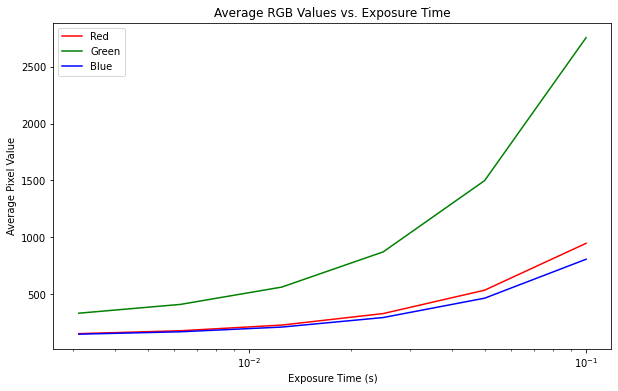

In [6]:
avg_red = []
avg_green = []
avg_blue = []

for i in range(len(dataset)):
    raw = rawpy.imread(dataset[i])
    array = np.array(raw.raw_image_visible)
    # Initialize channels with zeros
    Y_channel_mask = np.zeros_like(array)
    C1_channel_mask = np.zeros_like(array)
    C2_channel_mask = np.zeros_like(array)
    Y_channel_mask[0::2, 1::2] = array[0::2, 1::2]
    Y_channel_mask[1::2, 0::2] = array[1::2, 0::2]
    C1_channel_mask[1::2, 1::2] = array[1::2, 1::2]
    C2_channel_mask[0::2, 0::2] = array[0::2, 0::2]
    avg_red.append(np.mean(C2_channel_mask))
    avg_green.append(np.mean(Y_channel_mask))
    avg_blue.append(np.mean(C1_channel_mask))

plt.figure(figsize=(10, 6))
plt.plot(exposure_times, avg_red, 'r-', label='Red')
plt.plot(exposure_times, avg_green, 'g-', label='Green')
plt.plot(exposure_times, avg_blue, 'b-', label='Blue')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Average Pixel Value')
plt.title('Average RGB Values vs. Exposure Time')
plt.legend()
plt.xscale('log')  # Since exposure times decrease exponentially
plt.show()